# Cistopic analysis

In [1]:
import os
import pycisTopic
from pycisTopic.cistopic_class import create_cistopic_object
pycisTopic.__version__

'2.0a0'

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [3]:
root_dir = Path("/tscc/projects/ps-epigen/users/biy022/biccn/data/SNAREdata/scenicplus/")
os.chdir(root_dir / "L2_3_IT")

In [4]:
!mkdir -p pycistopic_outputs

In [5]:
## Some meta information
path_to_blacklist = "/tscc/projects/ps-epigen/users/biy022/scmethylhic/genome/hg38_blacklist.v2.bed.gz"

In [6]:
## Prepare the sample_id pd.Dataframe, not sure if this is necessary
meta_df = pd.read_csv("L2_3_IT_meta_data_25p_sampled.tsv", header=0, sep="\t", index_col=0)
meta_df["sample_id"] = "L2_3_IT"

In [7]:
meta_df.head()

orig.ident  nCount_RNA  \
R_20211021A_M1CR45_GACTAGTAAGATGTACAAACATCG     M1CR45        5728   
R_20210624B_FIR45_GCTAACGAAGATGTACACAGCAGA       FIR45       33807   
R_20220217B_ANGR94_AGAGTCAAGCCAAGACACCTCCAA     ANGR94       15553   
R_20211021A_M1CR40_AACCGAGAAGCAGGAAAACGCTTA     M1CR40       38752   
R_20210617B_ANGR47_AGTACAAGAAGACGGACAATGGAA     ANGR47        4311   

                                             nFeature_RNA        Batch  \
R_20211021A_M1CR45_GACTAGTAAGATGTACAAACATCG          2452  R_20211021A   
R_20210624B_FIR45_GCTAACGAAGATGTACACAGCAGA           7161  R_20210624B   
R_20220217B_ANGR94_AGAGTCAAGCCAAGACACCTCCAA          4843  R_20220217B   
R_20211021A_M1CR40_AACCGAGAAGCAGGAAAACGCTTA          7489  R_20211021A   
R_20210617B_ANGR47_AGTACAAGAAGACGGACAATGGAA          2169  R_20210617B   

                                             percent.mt Major_Class  \
R_20211021A_M1CR45_GACTAGTAAGATGTACAAACATCG    0.000000  Excitatory   
R_20210624B_FIR45_GCTAACGAAGATGTACACAGCAGA     0.269175  Excitatory   
R_20220217B_ANGR94_AGAGTCAAGCCAAGACACCTCCAA    0.000000  Excitatory   
R_20211021A_M1CR40_AACCGAGAAGCAGGAAAACGCTTA    0.010322  Excitatory   
R_20210617B_ANGR47_AGTACAAGAAGACGGACAATGGAA    0.115982  Excitatory   

                                              PatientID Region Subclass_F  \
R_20211021A_M1CR45_GACTAGTAAGATGTACAAACATCG     UW 7118    M1C    L2/3 IT   
R_20210624B_FIR45_GCTAACGAAGATGTACACAGCAGA   H19.30.004     FI    L2/3 IT   
R_20220217B_ANGR94_AGAGTCAAGCCAAGACACCTCCAA  H19.30.002    AnG    L2/3 IT   
R_20211021A_M1CR40_AACCGAGAAGCAGGAAAACGCTTA     UW 7118    M1C    L2/3 IT   
R_20210617B_ANGR47_AGTACAAGAAGACGGACAATGGAA  H19.30.004    AnG    L2/3 IT   

                                             Cell_type sample_id  
R_20211021A_M1CR45_GACTAGTAAGATGTACAAACATCG  L2/3 IT_3   L2_3_IT  
R_20210624B_FIR45_GCTAACGAAGATGTACACAGCAGA   L2/3 IT_6   L2_3_IT  
R_20220217B_ANGR94_AGAGTCAAGCCAAGACACCTCCAA  L2/3 IT_6   L2_3_IT  
R_20211021A_M1CR40_AACCGAGAAGCAGGAAAACGCTTA  L2/3 IT_6   L2_3_IT  
R_20210617B_ANGR47_AGTACAAGAAGACGGACAATGGAA  L2/3 IT_6   L2_3_IT

In [8]:
import scanpy as sc
atac_adata = sc.read_h5ad("L2_3_IT_atac_matrix.h5ad")

In [9]:
cell_names_tb = pd.read_csv("L2_3_IT_cell_barcodes_25p_sampled.tsv", header=None, sep="\t")
cell_names = cell_names_tb[0].tolist()
region_names_tb = pd.read_csv("L2_3_IT_atac_regions.tsv", header=None, sep="\t")
region_names = region_names_tb[0].tolist()
region_names = ["{}:{}-{}".format(*x.split("-")) for x in region_names]

In [10]:
cistopic_object = create_cistopic_object(
    fragment_matrix=atac_adata.X.T.tocsr(),
    cell_names=cell_names,
    region_names=region_names,
    path_to_blacklist=path_to_blacklist,
    project="L2_3_IT",
    tag_cells=False
)

2024-12-30 16:05:53,517 cisTopic     INFO     Removing blacklisted regions
2024-12-30 16:05:55,704 cisTopic     INFO     Creating CistopicObject
2024-12-30 16:05:58,435 cisTopic     INFO     Done!


In [11]:
cistopic_object.add_cell_data(meta_df)

Columns ['sample_id'] will be overwritten


In [12]:
print(cistopic_object)

CistopicObject from project L2_3_IT with n_cells × n_regions = 74674 × 552320


In [13]:
cistopic_object.cell_data.head()

cisTopic_log_nr_frag  \
R_20211021A_M1CR45_GACTAGTAAGATGTACAAACATCG             3.121232   
R_20210624B_FIR45_GCTAACGAAGATGTACACAGCAGA              3.079181   
R_20220217B_ANGR94_AGAGTCAAGCCAAGACACCTCCAA             3.374015   
R_20211021A_M1CR40_AACCGAGAAGCAGGAAAACGCTTA             3.402605   
R_20210617B_ANGR47_AGTACAAGAAGACGGACAATGGAA              2.89487   

                                            cisTopic_nr_acc cisTopic_nr_frag  \
R_20211021A_M1CR45_GACTAGTAAGATGTACAAACATCG          1311.0           1322.0   
R_20210624B_FIR45_GCTAACGAAGATGTACACAGCAGA           1194.0           1200.0   
R_20220217B_ANGR94_AGAGTCAAGCCAAGACACCTCCAA          2349.0           2366.0   
R_20211021A_M1CR40_AACCGAGAAGCAGGAAAACGCTTA          2499.0           2527.0   
R_20210617B_ANGR47_AGTACAAGAAGACGGACAATGGAA           779.0            785.0   

                                            cisTopic_log_nr_acc orig.ident  \
R_20211021A_M1CR45_GACTAGTAAGATGTACAAACATCG            3.117603     M1CR45   
R_20210624B_FIR45_GCTAACGAAGATGTACACAGCAGA             3.077004      FIR45   
R_20220217B_ANGR94_AGAGTCAAGCCAAGACACCTCCAA            3.370883     ANGR94   
R_20211021A_M1CR40_AACCGAGAAGCAGGAAAACGCTTA            3.397766     M1CR40   
R_20210617B_ANGR47_AGTACAAGAAGACGGACAATGGAA            2.891538     ANGR47   

                                             nCount_RNA  nFeature_RNA  \
R_20211021A_M1CR45_GACTAGTAAGATGTACAAACATCG        5728          2452   
R_20210624B_FIR45_GCTAACGAAGATGTACACAGCAGA        33807          7161   
R_20220217B_ANGR94_AGAGTCAAGCCAAGACACCTCCAA       15553          4843   
R_20211021A_M1CR40_AACCGAGAAGCAGGAAAACGCTTA       38752          7489   
R_20210617B_ANGR47_AGTACAAGAAGACGGACAATGGAA        4311          2169   

                                                   Batch  percent.mt  \
R_20211021A_M1CR45_GACTAGTAAGATGTACAAACATCG  R_20211021A    0.000000   
R_20210624B_FIR45_GCTAACGAAGATGTACACAGCAGA   R_20210624B    0.269175   
R_20220217B_ANGR94_AGAGTCAAGCCAAGACACCTCCAA  R_20220217B    0.000000   
R_20211021A_M1CR40_AACCGAGAAGCAGGAAAACGCTTA  R_20211021A    0.010322   
R_20210617B_ANGR47_AGTACAAGAAGACGGACAATGGAA  R_20210617B    0.115982   

                                            Major_Class   PatientID Region  \
R_20211021A_M1CR45_GACTAGTAAGATGTACAAACATCG  Excitatory     UW 7118    M1C   
R_20210624B_FIR45_GCTAACGAAGATGTACACAGCAGA   Excitatory  H19.30.004     FI   
R_20220217B_ANGR94_AGAGTCAAGCCAAGACACCTCCAA  Excitatory  H19.30.002    AnG   
R_20211021A_M1CR40_AACCGAGAAGCAGGAAAACGCTTA  Excitatory     UW 7118    M1C   
R_20210617B_ANGR47_AGTACAAGAAGACGGACAATGGAA  Excitatory  H19.30.004    AnG   

                                            Subclass_F  Cell_type sample_id  
R_20211021A_M1CR45_GACTAGTAAGATGTACAAACATCG    L2/3 IT  L2/3 IT_3   L2_3_IT  
R_20210624B_FIR45_GCTAACGAAGATGTACACAGCAGA     L2/3 IT  L2/3 IT_6   L2_3_IT  
R_20220217B_ANGR94_AGAGTCAAGCCAAGACACCTCCAA    L2/3 IT  L2/3 IT_6   L2_3_IT  
R_20211021A_M1CR40_AACCGAGAAGCAGGAAAACGCTTA    L2/3 IT  L2/3 IT_6   L2_3_IT  
R_20210617B_ANGR47_AGTACAAGAAGACGGACAATGGAA    L2/3 IT  L2/3 IT_6   L2_3_IT

In [14]:
import pickle
pickle.dump(
    cistopic_object,
    open("pycistopic_outputs/cistopic_object.pickle", "wb")
)

In [15]:
# dispatch models to different clusters
!mkdir -p pycistopic_slurm/

In [16]:
slurm_script_template = (
    "#!/bin/bash\n"
    "#SBATCH -p condo\n"
    "#SBATCH -q condo\n"
    "#SBATCH -J {0}\n"
    "#SBATCH -N 3\n"
    "#SBATCH -c 8\n"
    "#SBATCH --mem 300G\n"
    "#SBATCH -t 8:00:00\n"
    "#SBATCH -o /tscc/projects/ps-epigen/users/biy022/biccn/data/SNAREdata/scenicplus/L2_3_IT/pycistopic_slurm/{0}.out\n"
    "#SBATCH -e /tscc/projects/ps-epigen/users/biy022/biccn/data/SNAREdata/scenicplus/L2_3_IT/pycistopic_slurm/{0}.err\n"
    "#SBATCH --mail-user biy022@health.ucsd.edu\n"
    "#SBATCH --mail-type FAIL\n"
    "#SBATCH -A csd772\n"
    "\n"
    "set -e\n"
    "source ~/.bashrc\n"
    "conda activate scenicplus\n"
    "\n"
    "cd /tscc/projects/ps-epigen/users/biy022/biccn/analysis/scenicplus/L2_3_IT/\n"
    "python3 02.1_mallet_script.py {0} "
    "/tscc/projects/ps-epigen/users/biy022/biccn/data/SNAREdata/scenicplus/L2_3_IT/pycistopic_outputs/cistopic_object.pickle\n"
)

In [17]:
for n_topic in [2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]:
    with open("pycistopic_slurm/model_{}_slurm.sh".format(n_topic), "w") as f:
        f.write(slurm_script_template.format(n_topic))

In [18]:
# Run models in cluster

In [4]:
cistopic_object = pickle.load(open("pycistopic_outputs/cistopic_object.pickle", "rb"))

In [5]:
models = []
for file in os.listdir("pycistopic_outputs"):
    if file.startswith("Topic") and file.endswith(".pkl"):
        model = pickle.load(open(os.path.join("pycistopic_outputs/", file), "rb"))
        models.append(model)

/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-12-30 18:11:18,901	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [6]:
pickle.dump(
    models,
    open("pycistopic_outputs/cistopic_models.pkl", "wb")
)

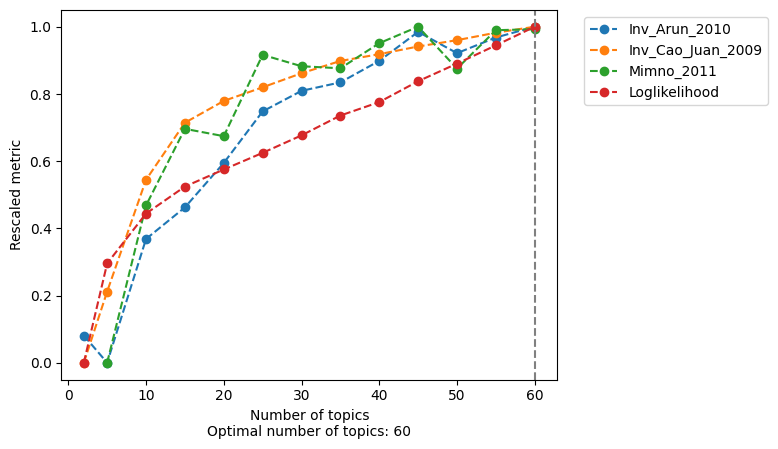

In [7]:
from pycisTopic.lda_models import evaluate_models
model = evaluate_models(models, return_model = True)

In [8]:
cistopic_object.add_LDA_model(model)
pickle.dump(
    cistopic_object,
    open("pycistopic_outputs/cistopic_object.pickle", "wb")
)

## Clustering with cell to topics distributions

In [9]:
from pycisTopic.clust_vis import (
    find_clusters,
    run_umap,
    run_tsne,
    plot_metadata,
    plot_topic,
    cell_topic_heatmap,
    harmony
)

In [10]:
cistopic_object = pickle.load(open("pycistopic_outputs/cistopic_object.pickle", "rb"))

In [11]:
find_clusters(
    cistopic_object,
    target="cell",
    k=20,
    res=[0.2, 0.4, 0.6, 0.8, 1.0],
    prefix="pycisTopic_",
    scale=True
)

2024-12-30 18:14:18,177 cisTopic     INFO     Finding neighbours


In [12]:
run_umap(cistopic_object, target="cell", scale=True)

2024-12-30 18:16:06,011 cisTopic     INFO     Running UMAP


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [13]:
cistopic_object.cell_data.head()

cisTopic_log_nr_frag  \
R_20211021A_M1CR45_GACTAGTAAGATGTACAAACATCG             3.121232   
R_20210624B_FIR45_GCTAACGAAGATGTACACAGCAGA              3.079181   
R_20220217B_ANGR94_AGAGTCAAGCCAAGACACCTCCAA             3.374015   
R_20211021A_M1CR40_AACCGAGAAGCAGGAAAACGCTTA             3.402605   
R_20210617B_ANGR47_AGTACAAGAAGACGGACAATGGAA              2.89487   

                                            cisTopic_nr_acc cisTopic_nr_frag  \
R_20211021A_M1CR45_GACTAGTAAGATGTACAAACATCG          1311.0           1322.0   
R_20210624B_FIR45_GCTAACGAAGATGTACACAGCAGA           1194.0           1200.0   
R_20220217B_ANGR94_AGAGTCAAGCCAAGACACCTCCAA          2349.0           2366.0   
R_20211021A_M1CR40_AACCGAGAAGCAGGAAAACGCTTA          2499.0           2527.0   
R_20210617B_ANGR47_AGTACAAGAAGACGGACAATGGAA           779.0            785.0   

                                            cisTopic_log_nr_acc orig.ident  \
R_20211021A_M1CR45_GACTAGTAAGATGTACAAACATCG            3.117603     M1CR45   
R_20210624B_FIR45_GCTAACGAAGATGTACACAGCAGA             3.077004      FIR45   
R_20220217B_ANGR94_AGAGTCAAGCCAAGACACCTCCAA            3.370883     ANGR94   
R_20211021A_M1CR40_AACCGAGAAGCAGGAAAACGCTTA            3.397766     M1CR40   
R_20210617B_ANGR47_AGTACAAGAAGACGGACAATGGAA            2.891538     ANGR47   

                                             nCount_RNA  nFeature_RNA  \
R_20211021A_M1CR45_GACTAGTAAGATGTACAAACATCG        5728          2452   
R_20210624B_FIR45_GCTAACGAAGATGTACACAGCAGA        33807          7161   
R_20220217B_ANGR94_AGAGTCAAGCCAAGACACCTCCAA       15553          4843   
R_20211021A_M1CR40_AACCGAGAAGCAGGAAAACGCTTA       38752          7489   
R_20210617B_ANGR47_AGTACAAGAAGACGGACAATGGAA        4311          2169   

                                                   Batch  percent.mt  \
R_20211021A_M1CR45_GACTAGTAAGATGTACAAACATCG  R_20211021A    0.000000   
R_20210624B_FIR45_GCTAACGAAGATGTACACAGCAGA   R_20210624B    0.269175   
R_20220217B_ANGR94_AGAGTCAAGCCAAGACACCTCCAA  R_20220217B    0.000000   
R_20211021A_M1CR40_AACCGAGAAGCAGGAAAACGCTTA  R_20211021A    0.010322   
R_20210617B_ANGR47_AGTACAAGAAGACGGACAATGGAA  R_20210617B    0.115982   

                                            Major_Class   PatientID Region  \
R_20211021A_M1CR45_GACTAGTAAGATGTACAAACATCG  Excitatory     UW 7118    M1C   
R_20210624B_FIR45_GCTAACGAAGATGTACACAGCAGA   Excitatory  H19.30.004     FI   
R_20220217B_ANGR94_AGAGTCAAGCCAAGACACCTCCAA  Excitatory  H19.30.002    AnG   
R_20211021A_M1CR40_AACCGAGAAGCAGGAAAACGCTTA  Excitatory     UW 7118    M1C   
R_20210617B_ANGR47_AGTACAAGAAGACGGACAATGGAA  Excitatory  H19.30.004    AnG   

                                            Subclass_F  Cell_type sample_id  \
R_20211021A_M1CR45_GACTAGTAAGATGTACAAACATCG    L2/3 IT  L2/3 IT_3   L2_3_IT   
R_20210624B_FIR45_GCTAACGAAGATGTACACAGCAGA     L2/3 IT  L2/3 IT_6   L2_3_IT   
R_20220217B_ANGR94_AGAGTCAAGCCAAGACACCTCCAA    L2/3 IT  L2/3 IT_6   L2_3_IT   
R_20211021A_M1CR40_AACCGAGAAGCAGGAAAACGCTTA    L2/3 IT  L2/3 IT_6   L2_3_IT   
R_20210617B_ANGR47_AGTACAAGAAGACGGACAATGGAA    L2/3 IT  L2/3 IT_6   L2_3_IT   

                                            pycisTopic_leiden_20_0.2  \
R_20211021A_M1CR45_GACTAGTAAGATGTACAAACATCG                        0   
R_20210624B_FIR45_GCTAACGAAGATGTACACAGCAGA                         1   
R_20220217B_ANGR94_AGAGTCAAGCCAAGACACCTCCAA                        0   
R_20211021A_M1CR40_AACCGAGAAGCAGGAAAACGCTTA                        0   
R_20210617B_ANGR47_AGTACAAGAAGACGGACAATGGAA                        1   

                                            pycisTopic_leiden_20_0.4  \
R_20211021A_M1CR45_GACTAGTAAGATGTACAAACATCG                        0   
R_20210624B_FIR45_GCTAACGAAGATGTACACAGCAGA                         2   
R_20220217B_ANGR94_AGAGTCAAGCCAAGACACCTCCAA                        4   
R_20211021A_M1CR40_AACCGAGAAGCAGGAAAACGCTTA                        0   
R_20210617B_ANGR47_AGTACAAGAAGACGGACAATGGAA                        2   

   

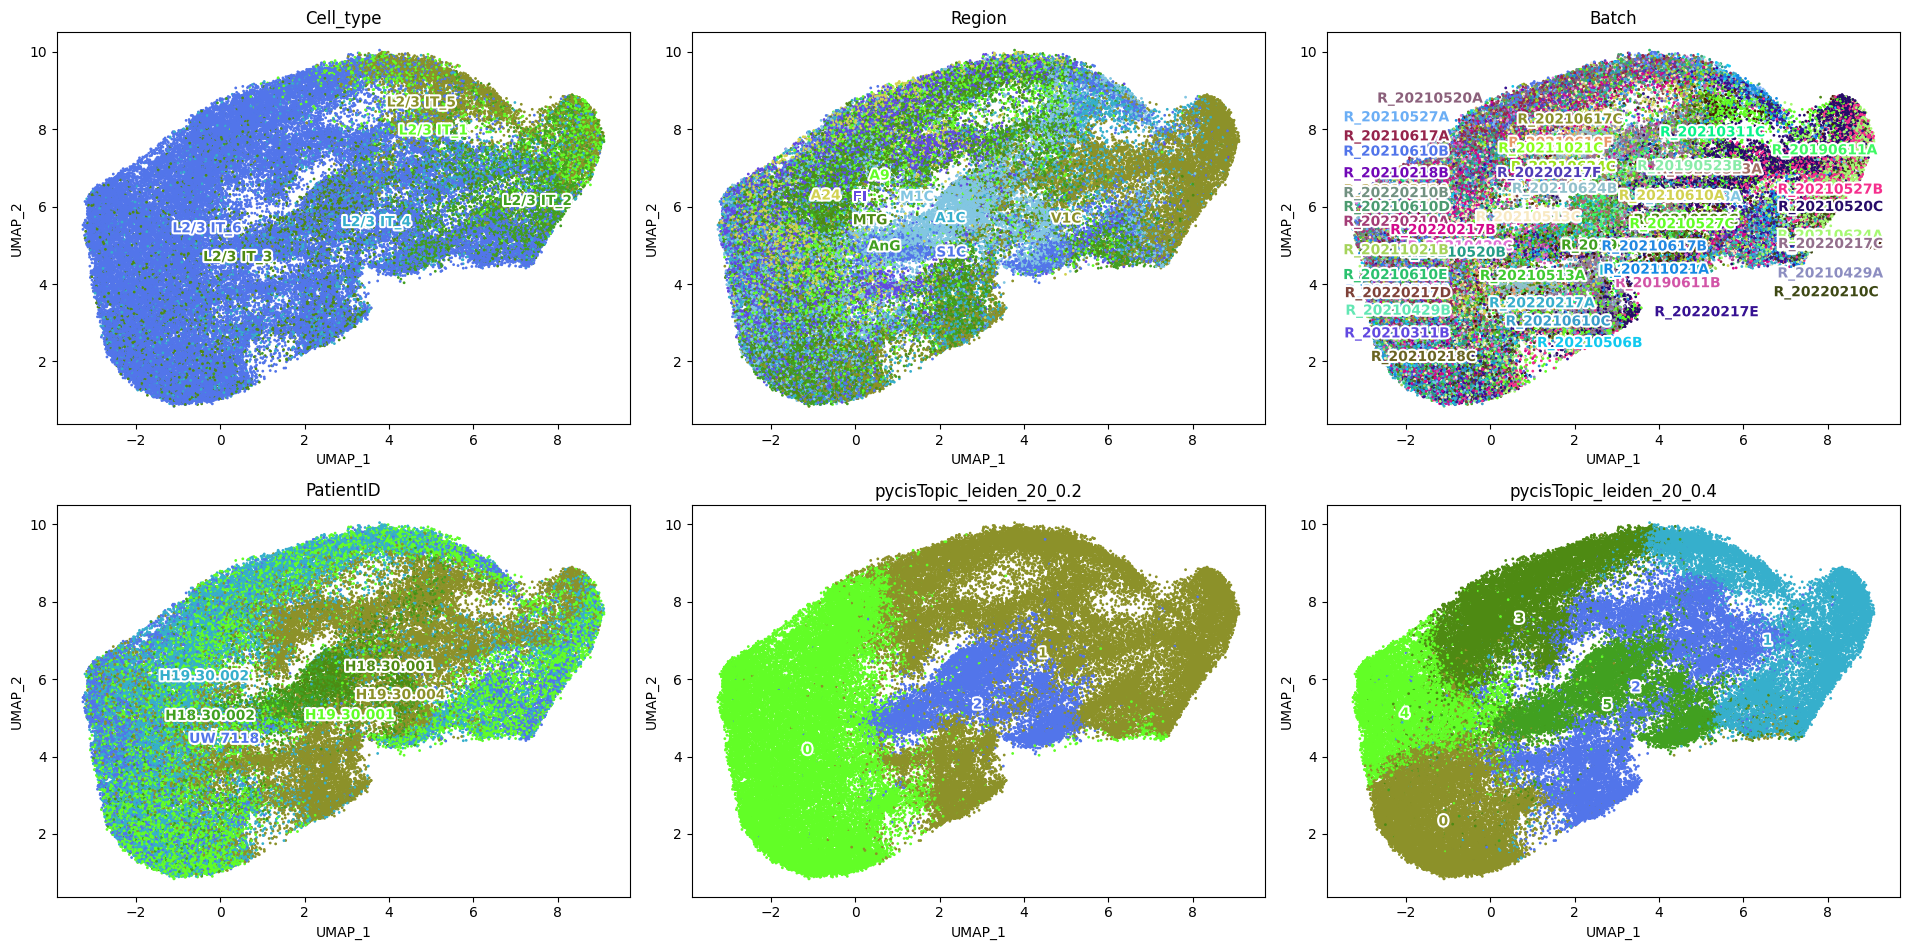

In [14]:
plot_metadata(
    cistopic_object,
    reduction_name="UMAP",
    variables=[
        "Cell_type", 
        "Region", 
        "Batch", 
        "PatientID",
        "pycisTopic_leiden_20_0.2",
        "pycisTopic_leiden_20_0.4"
    ],
    target="cell",
    num_columns=3,
    text_size=10,
    dot_size=1,
    show_legend=False
)

In [15]:
pickle.dump(
    cistopic_object,
    open("pycistopic_outputs/cistopic_object.pickle", "wb")
)

## Topic binarization

In [16]:
from pycisTopic.topic_binarization import binarize_topics

In [17]:
cistopic_object = pickle.load(open("pycistopic_outputs/cistopic_object.pickle", "rb"))

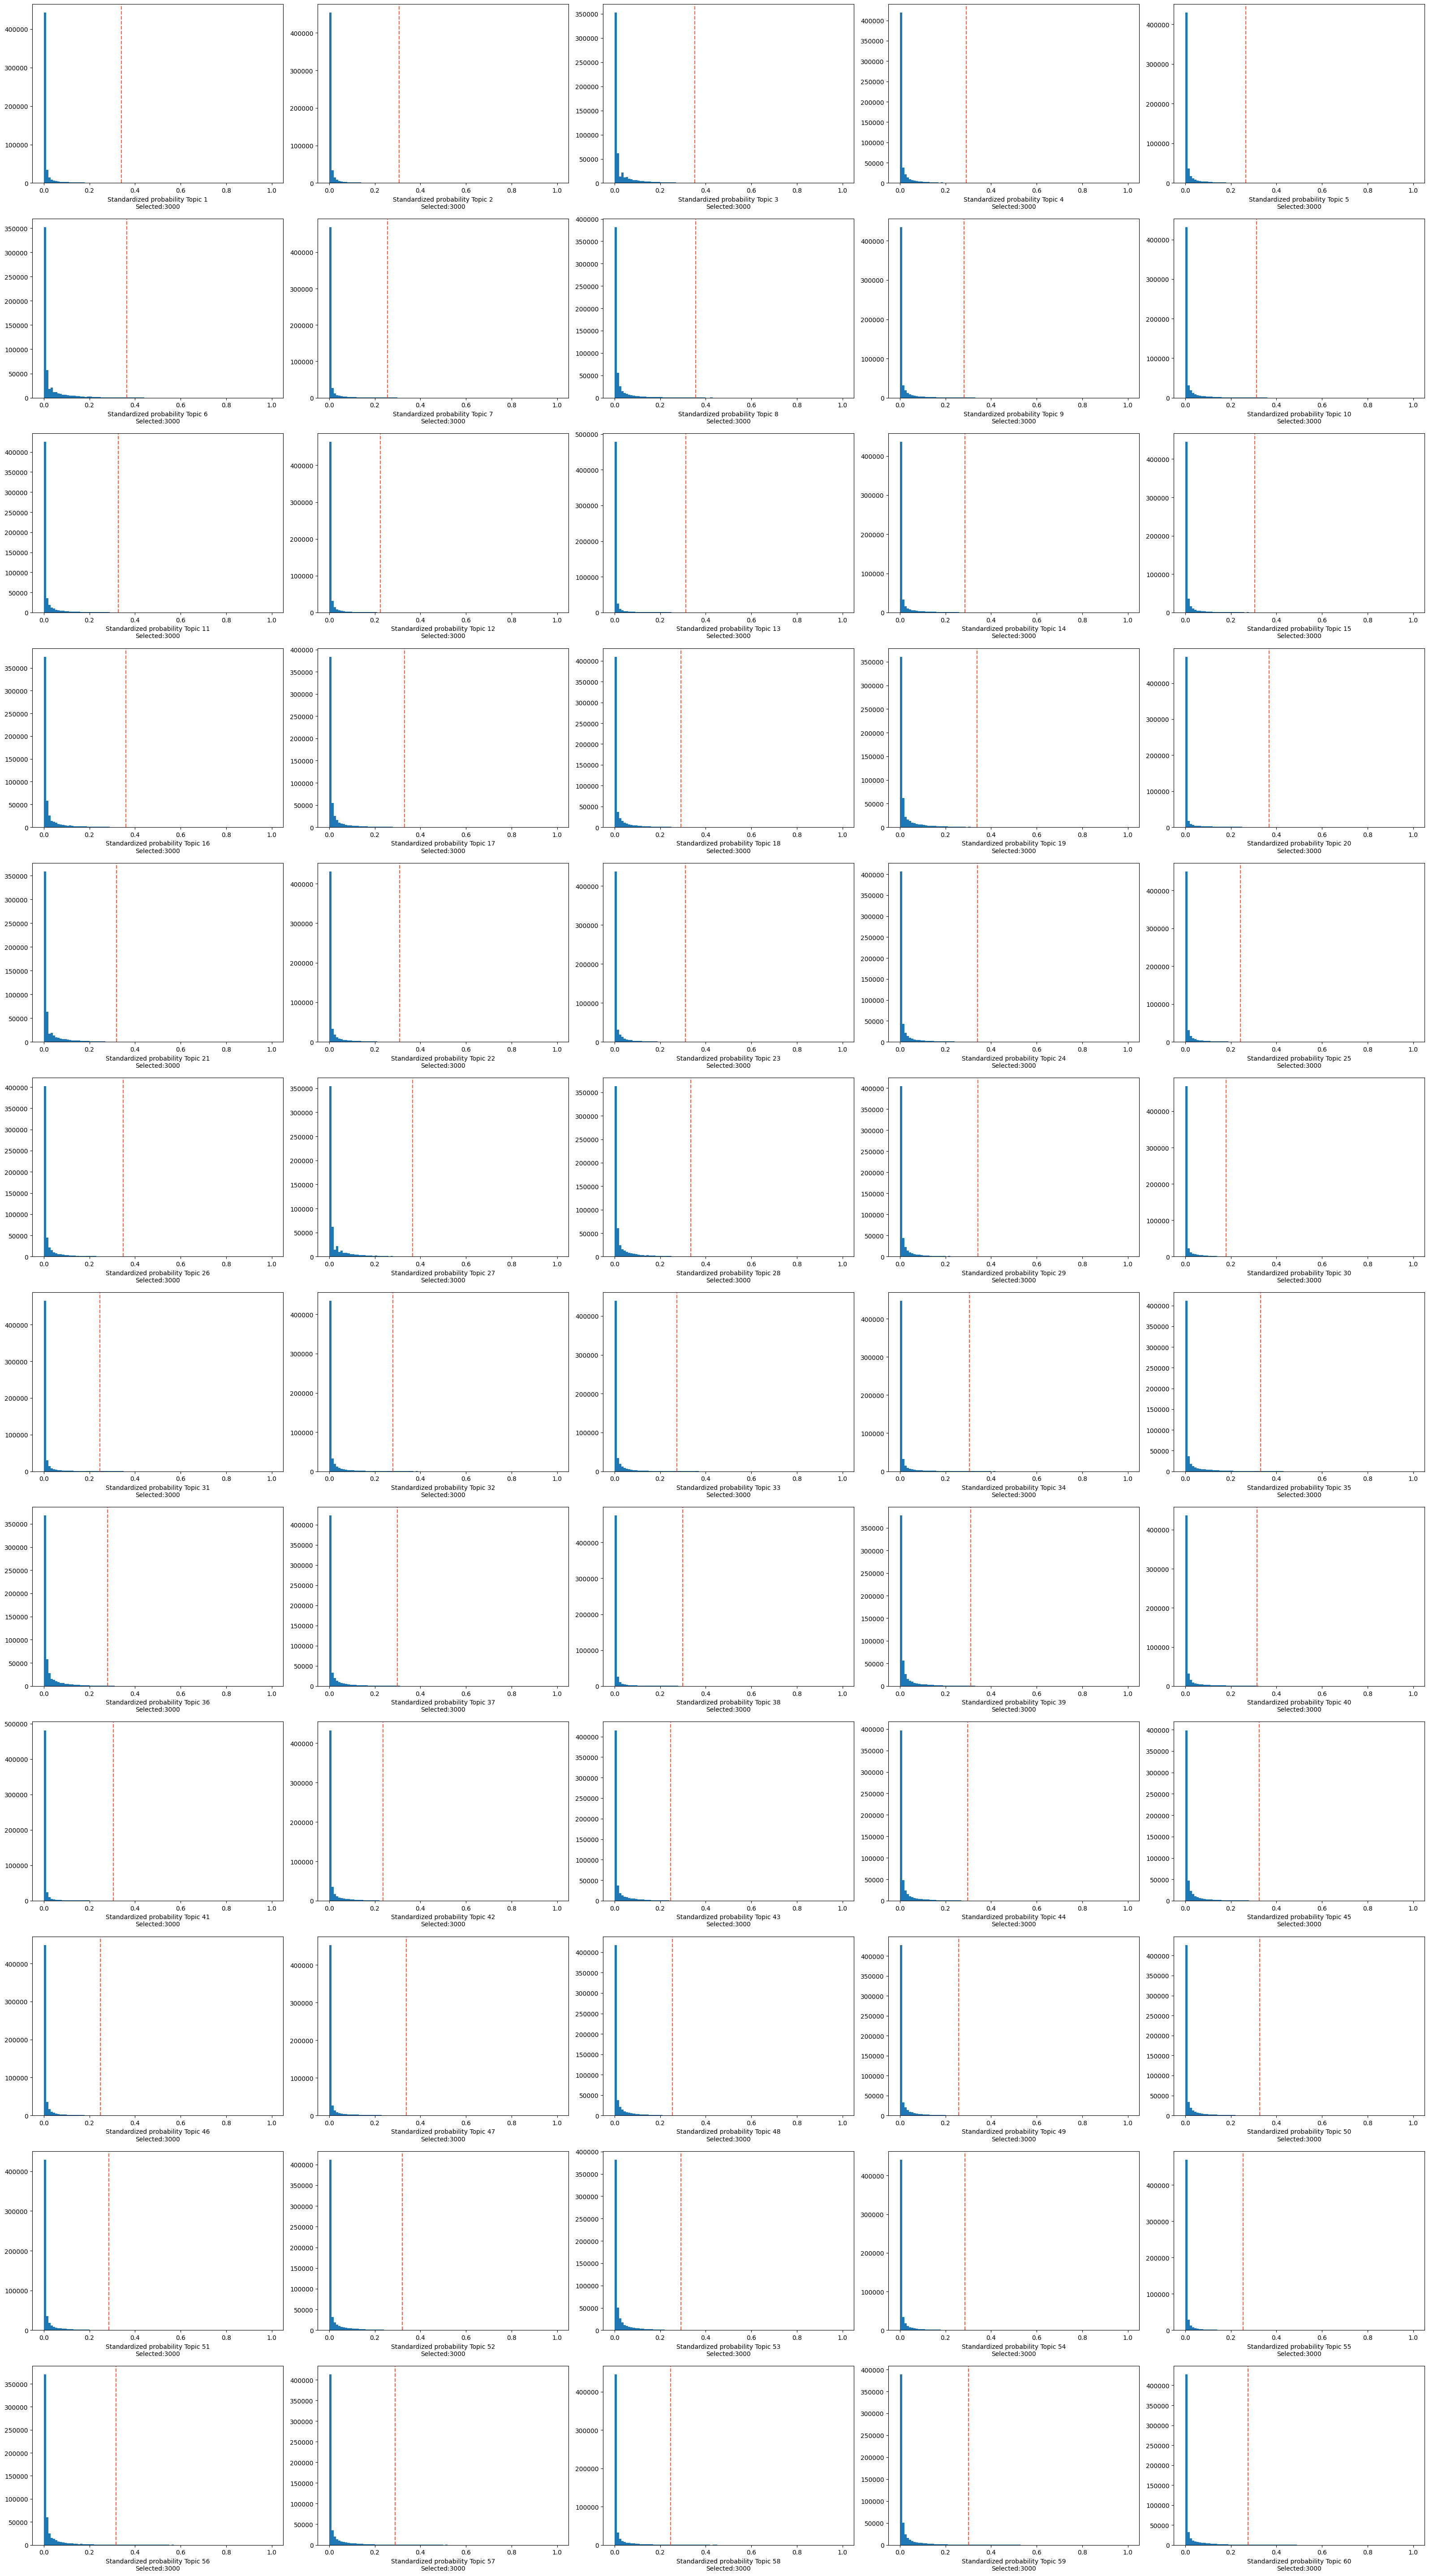

In [18]:
region_bin_topics_top_3k = binarize_topics(
    cistopic_object, method='ntop', ntop = 3_000,
    plot=True, num_columns=5
)

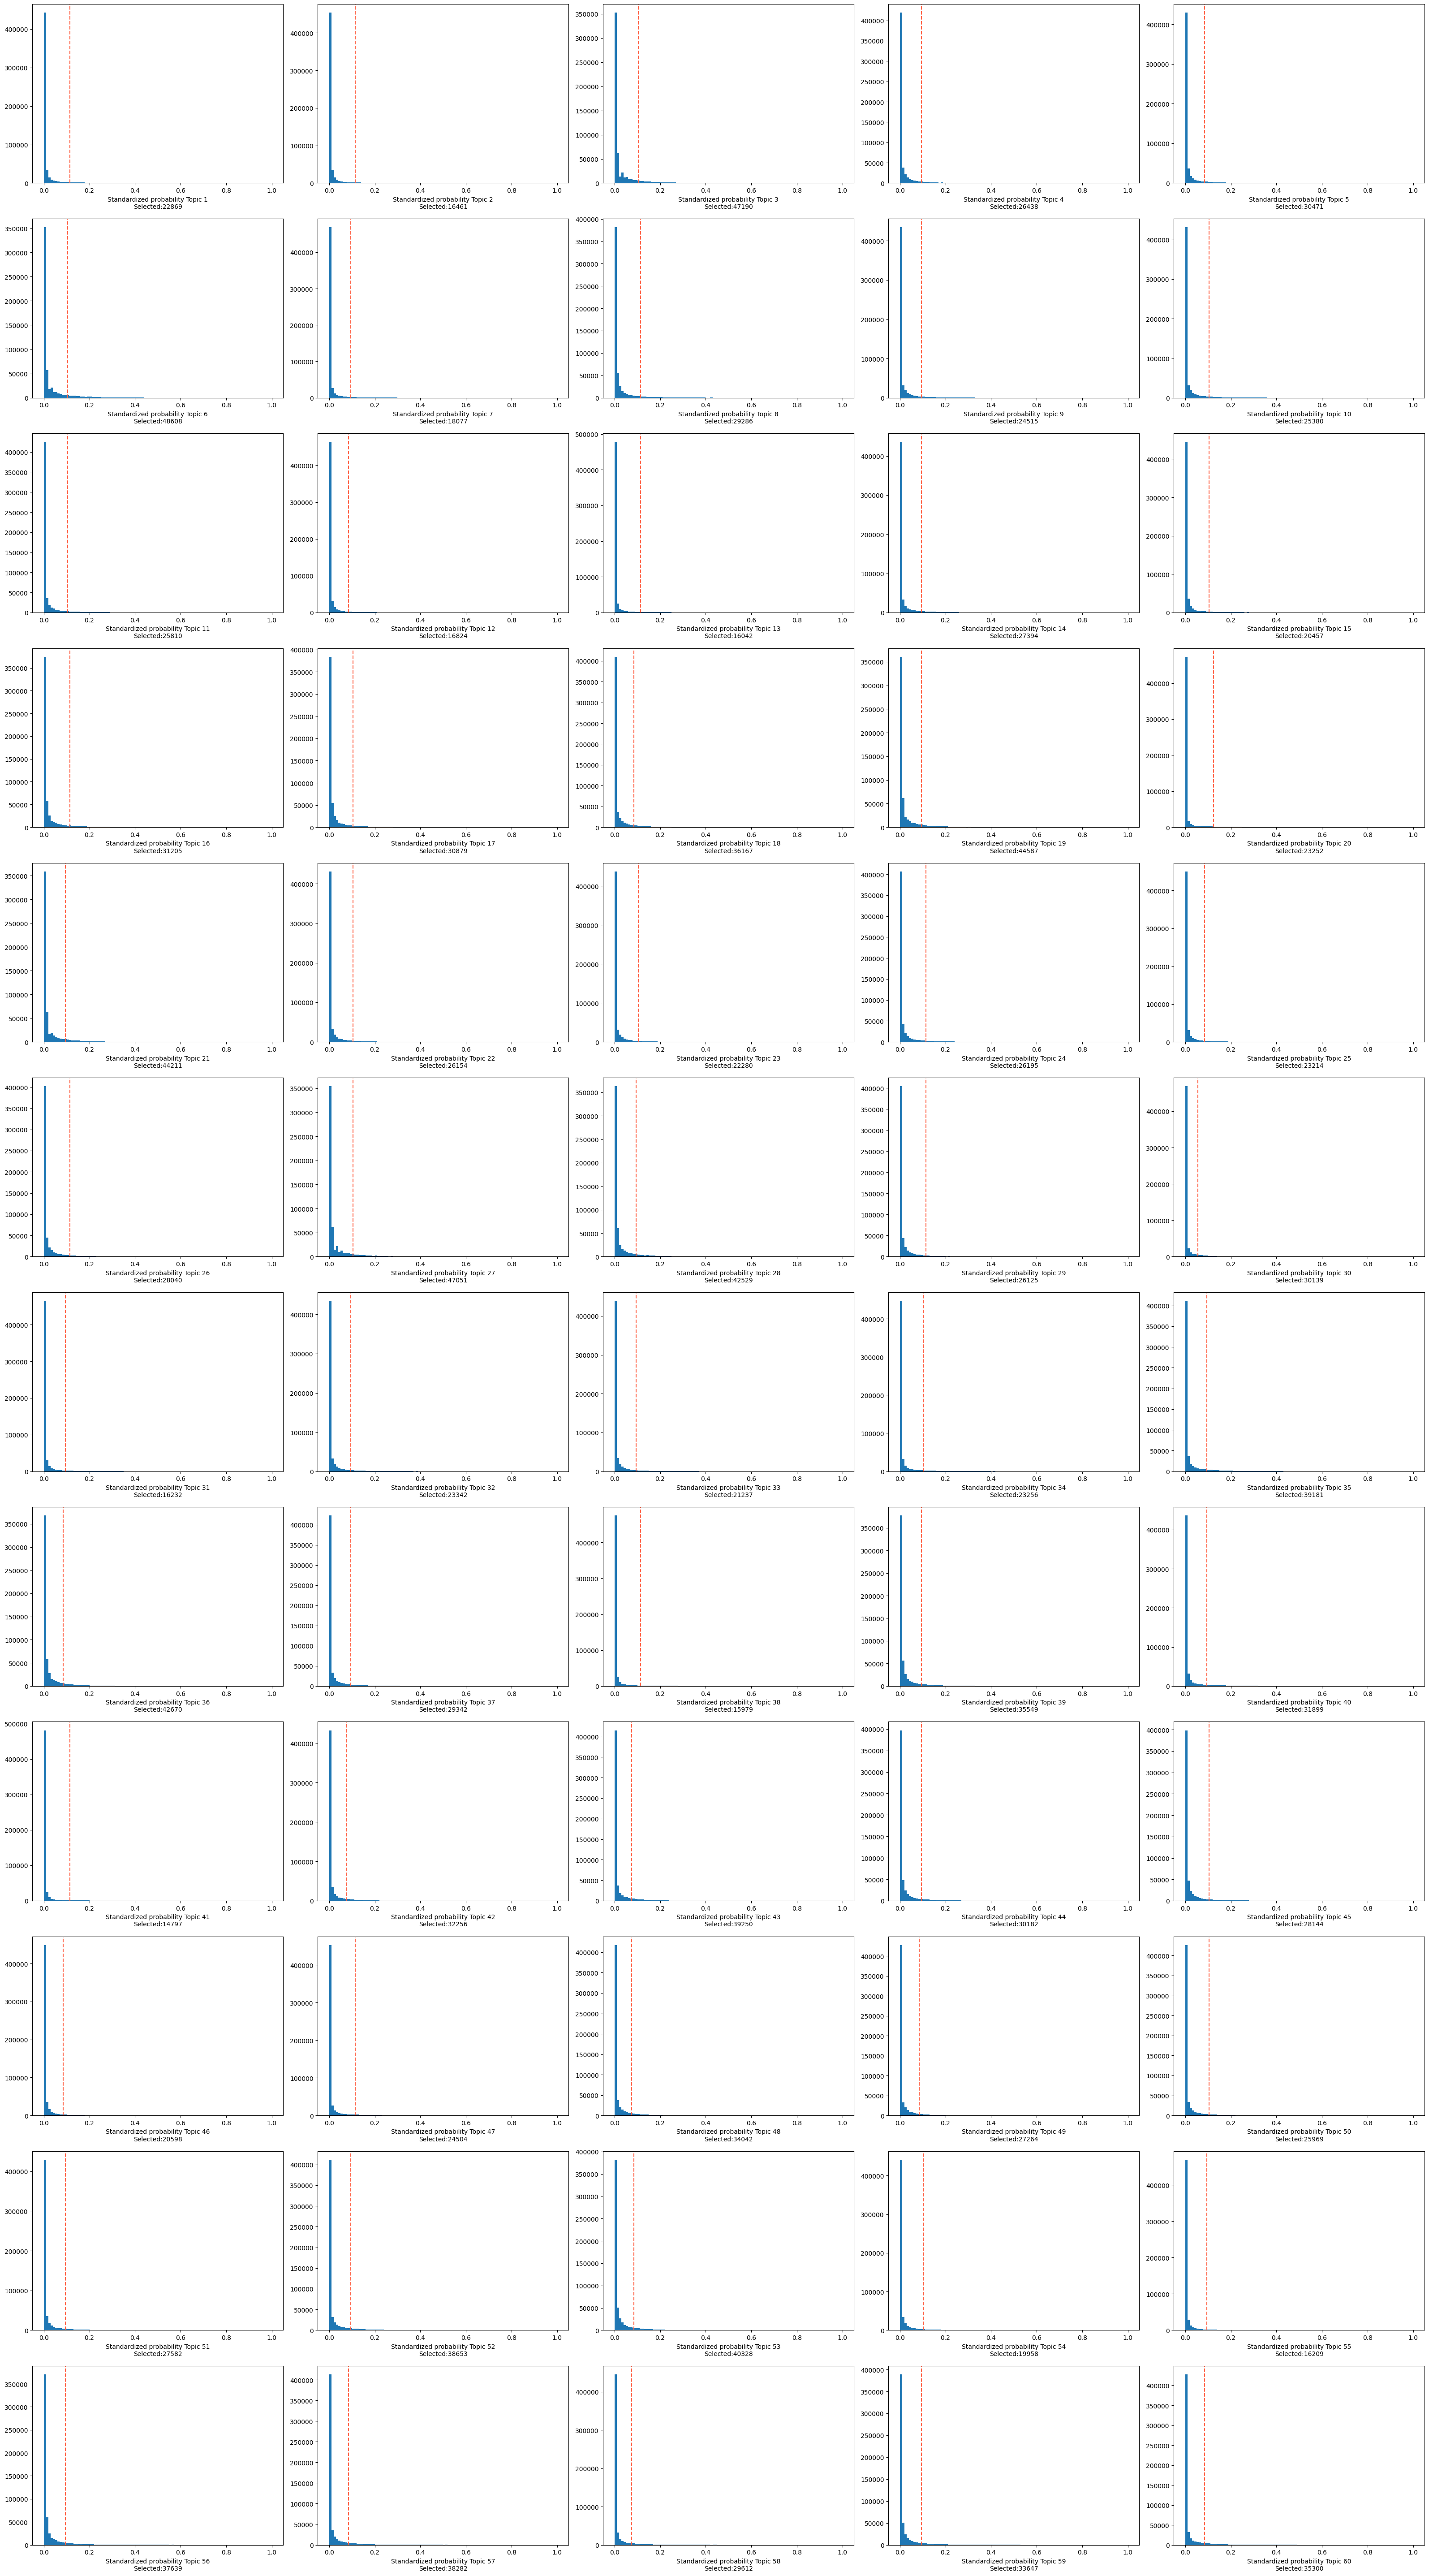

In [19]:
region_bin_topics_otsu = binarize_topics(
    cistopic_object, method='otsu',
    plot=True, num_columns=5
)

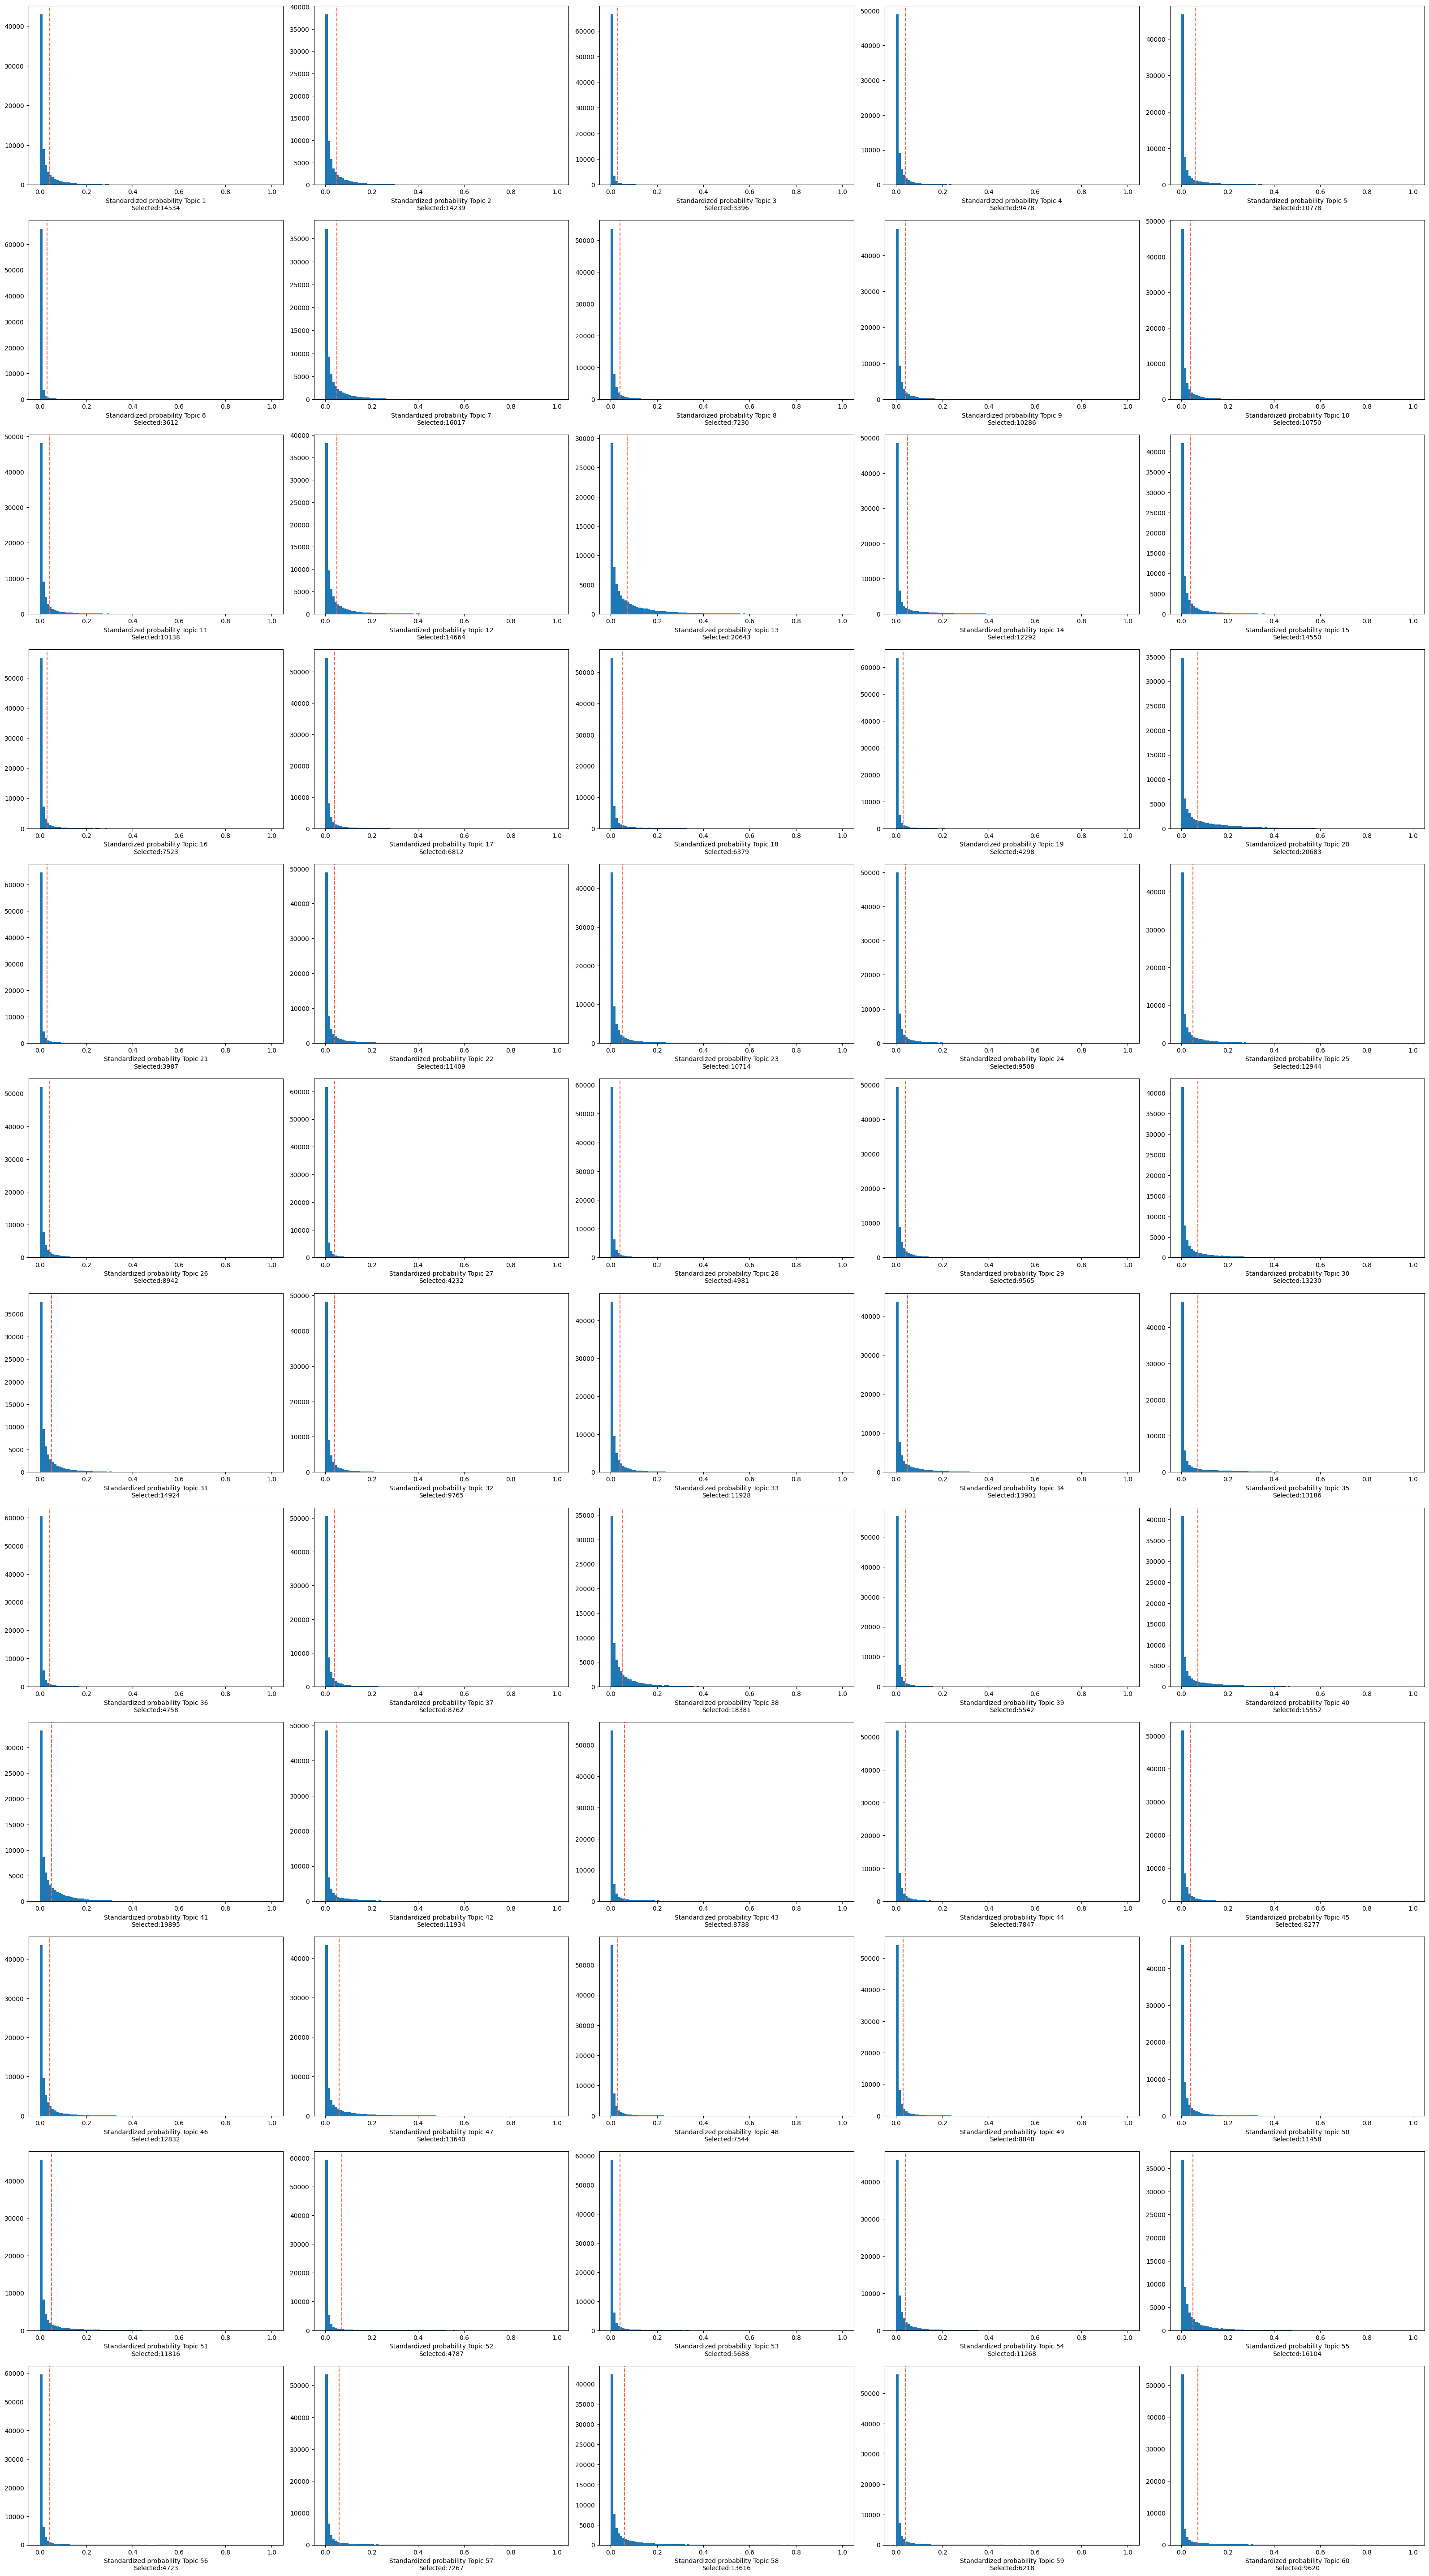

In [20]:
binarized_cell_topic = binarize_topics(
    cistopic_object,
    target="cell",
    method="li",
    plot=True,
    num_columns=5, 
    nbins=100
)

In [21]:
from pycisTopic.topic_qc import compute_topic_metrics, plot_topic_qc, topic_annotation
import matplotlib.pyplot as plt
from pycisTopic.utils import fig2img

In [22]:
topic_qc_metrics = compute_topic_metrics(cistopic_object)

In [23]:
fig_dict={}
fig_dict['CoherenceVSAssignments'] = plot_topic_qc(
    topic_qc_metrics, var_x='Coherence', var_y='Log10_Assignments', 
    var_color='Gini_index', plot=False, return_fig=True
)
fig_dict['AssignmentsVSCells_in_bin'] = plot_topic_qc(
    topic_qc_metrics, var_x='Log10_Assignments', var_y='Cells_in_binarized_topic', 
    var_color='Gini_index', plot=False, return_fig=True
)
fig_dict['CoherenceVSCells_in_bin'] = plot_topic_qc(
    topic_qc_metrics, var_x='Coherence', var_y='Cells_in_binarized_topic', 
    var_color='Gini_index', plot=False, return_fig=True
)
fig_dict['CoherenceVSRegions_in_bin'] = plot_topic_qc(
    topic_qc_metrics, var_x='Coherence', var_y='Regions_in_binarized_topic', 
    var_color='Gini_index', plot=False, return_fig=True
)
fig_dict['CoherenceVSMarginal_dist'] = plot_topic_qc(
    topic_qc_metrics, var_x='Coherence', var_y='Marginal_topic_dist', 
    var_color='Gini_index', plot=False, return_fig=True
)
fig_dict['CoherenceVSGini_index'] = plot_topic_qc(
    topic_qc_metrics, var_x='Coherence', var_y='Gini_index', 
    var_color='Gini_index', plot=False, return_fig=True
)

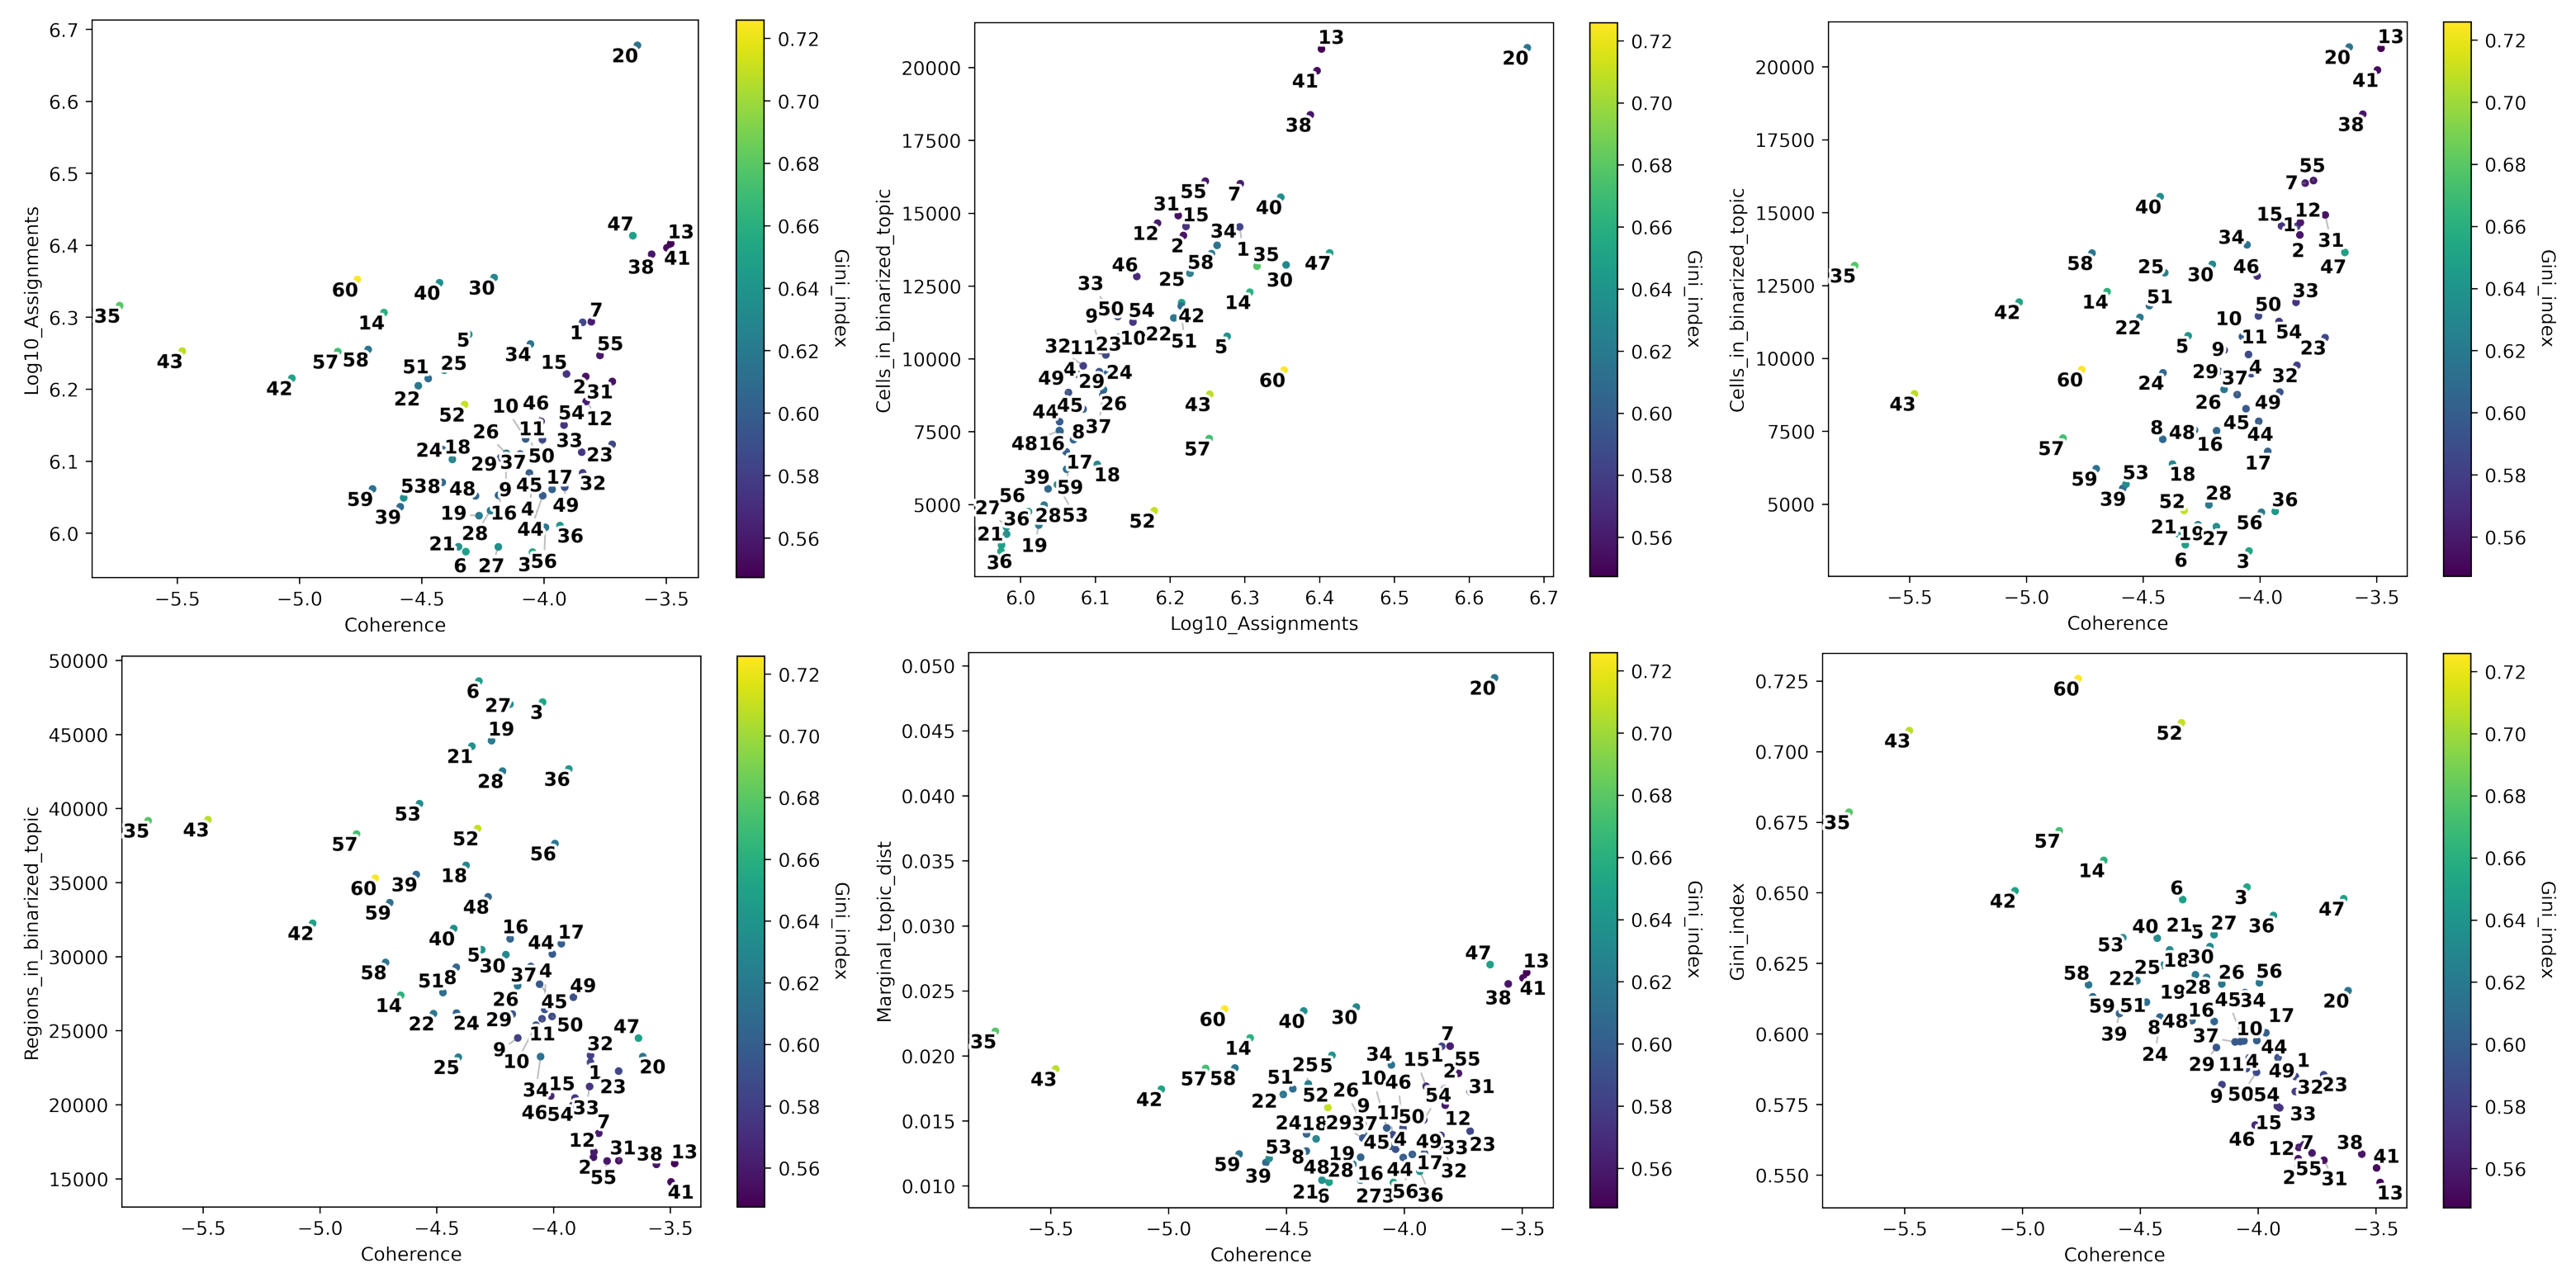

In [24]:
fig = plt.figure(figsize=(40, 43))
i = 1
for fig_ in fig_dict.keys():
    plt.subplot(2, 3, i)
    img = fig2img(fig_dict[fig_])
    plt.imshow(img)
    plt.axis('off')
    i += 1
plt.subplots_adjust(wspace=0, hspace=-0.70)
plt.show()

In [25]:
topic_annot = topic_annotation(
    cistopic_object,
    annot_var="Cell_type",
    binarized_cell_topic=binarized_cell_topic,
    general_topic_thr=0.2
)

## DAR

In [26]:
from pycisTopic.diff_features import (
    impute_accessibility,
    normalize_scores,
    find_highly_variable_features,
    find_diff_features
)
import numpy as np

In [27]:
imputed_acc_obj = impute_accessibility(
    cistopic_object,
    selected_cells=None,
    selected_regions=None,
    scale_factor=10**6
)

2024-12-30 18:22:53,939 cisTopic     INFO     Imputing region accessibility
2024-12-30 18:22:53,940 cisTopic     INFO     Impute region accessibility for regions 0-20000
2024-12-30 18:23:01,936 cisTopic     INFO     Impute region accessibility for regions 20000-40000
2024-12-30 18:23:09,815 cisTopic     INFO     Impute region accessibility for regions 40000-60000
2024-12-30 18:23:17,699 cisTopic     INFO     Impute region accessibility for regions 60000-80000
2024-12-30 18:23:25,572 cisTopic     INFO     Impute region accessibility for regions 80000-100000
2024-12-30 18:23:33,462 cisTopic     INFO     Impute region accessibility for regions 100000-120000
2024-12-30 18:23:41,361 cisTopic     INFO     Impute region accessibility for regions 120000-140000
2024-12-30 18:23:49,240 cisTopic     INFO     Impute region accessibility for regions 140000-160000
2024-12-30 18:23:57,122 cisTopic     INFO     Impute region accessibility for regions 160000-180000
2024-12-30 18:24:05,031 cisTopic     

In [28]:
normalized_imputed_acc_obj = normalize_scores(imputed_acc_obj, scale_factor=10**4)

2024-12-30 18:27:02,709 cisTopic     INFO     Normalizing imputed data
2024-12-30 18:29:48,456 cisTopic     INFO     Done!


2024-12-30 18:29:51,397 cisTopic     INFO     Calculating mean
2024-12-30 18:30:24,062 cisTopic     INFO     Calculating variance


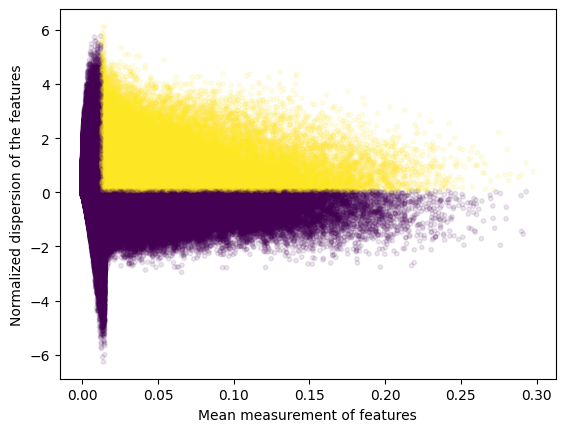

2024-12-30 18:41:19,816 cisTopic     INFO     Done!


In [29]:
variable_regions = find_highly_variable_features(
    normalized_imputed_acc_obj,
    min_disp=0.05,
    min_mean=0.0125,
    max_mean=3,
    max_disp=np.inf,
    n_bins=20,
    n_top_features=None,
    plot=True
)

In [30]:
len(variable_regions)

75786

In [31]:
markers_dict = find_diff_features(
    cistopic_object,
    imputed_acc_obj,
    variable="Cell_type",
    var_features=variable_regions,
    contrasts=None,
    adjpval_thr=0.05,
    log2fc_thr=np.log2(1),
    n_cpu=20,
    _temp_dir="/tscc/nfs/home/biy022/tmp/"
)

2024-12-30 18:42:51,391	INFO worker.py:1724 -- Started a local Ray instance.


2024-12-30 18:42:52,281 cisTopic     INFO     Subsetting data for L2/3 IT_1 (2521 of 74674)
2024-12-30 18:42:57,081 cisTopic     INFO     Computing p-value for L2/3 IT_1
2024-12-30 18:43:24,017 cisTopic     INFO     Computing log2FC for L2/3 IT_1
2024-12-30 18:43:25,966 cisTopic     INFO     L2/3 IT_1 done!
2024-12-30 18:43:25,988 cisTopic     INFO     Subsetting data for L2/3 IT_2 (5306 of 74674)
2024-12-30 18:43:27,727 cisTopic     INFO     Computing p-value for L2/3 IT_2
2024-12-30 18:43:48,985 cisTopic     INFO     Computing log2FC for L2/3 IT_2
2024-12-30 18:43:49,529 cisTopic     INFO     L2/3 IT_2 done!
2024-12-30 18:43:50,234 cisTopic     INFO     Subsetting data for L2/3 IT_3 (4906 of 74674)
2024-12-30 18:43:51,967 cisTopic     INFO     Computing p-value for L2/3 IT_3
2024-12-30 18:44:13,971 cisTopic     INFO     Computing log2FC for L2/3 IT_3
2024-12-30 18:44:14,474 cisTopic     INFO     L2/3 IT_3 done!
2024-12-30 18:44:15,182 cisTopic     INFO     Subsetting data for L2/3 IT

In [32]:
from pycisTopic.clust_vis import plot_imputed_features

In [33]:
print("Number of DARs found:")
print("---------------------")
for x in markers_dict:
    print(f"  {x}: {len(markers_dict[x])}")

Number of DARs found:
---------------------
  L2/3 IT_1: 29303
  L2/3 IT_2: 30281
  L2/3 IT_3: 33028
  L2/3 IT_4: 30669
  L2/3 IT_5: 29261
  L2/3 IT_6: 44261


## Save region sets

In [40]:
os.makedirs("pycistopic_outputs/region_sets", exist_ok = True)
os.makedirs("pycistopic_outputs/region_sets/Topics_otsu", exist_ok = True)
os.makedirs("pycistopic_outputs/region_sets/Topics_top_3k", exist_ok = True)
os.makedirs("pycistopic_outputs/region_sets/DARs_celltypes", exist_ok = True)

In [41]:
from pycisTopic.utils import region_names_to_coordinates

In [42]:
for topic in region_bin_topics_otsu:
    region_names_to_coordinates(
        region_bin_topics_otsu[topic].index
    ).sort_values(["Chromosome", "Start", "End"]).to_csv(
        os.path.join("pycistopic_outputs/region_sets/Topics_otsu/", f"{topic}.bed"),
        sep="\t", header=False, index=False
    )

In [43]:
for topic in region_bin_topics_top_3k:
    region_names_to_coordinates(
        region_bin_topics_top_3k[topic].index
    ).sort_values(["Chromosome", "Start", "End"]).to_csv(
        os.path.join("pycistopic_outputs/region_sets/Topics_top_3k/", f"{topic}.bed"),
        sep="\t", header=False, index=False
    )

In [45]:
for subtype in markers_dict:
    subtype_name = subtype.replace(" ", "_").replace("/", "_")
    region_names_to_coordinates(
        markers_dict[subtype].index
    ).sort_values(["Chromosome", "Start", "End"]).to_csv(
        os.path.join("pycistopic_outputs/region_sets/DARs_celltypes/", f"{subtype_name}.bed"),
        sep="\t", header=False, index=False
    )